<a href="https://colab.research.google.com/github/noviantisafitri/Forecasting-Data-Mining/blob/main/Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**FORECASTING SAMSUNG ELECTRONICS STOCK HISTORICAL PRICE**

#**Import Library**

In [ ]:
# Manipulasi dan analisis data
import pandas as pd
import numpy as np

# Visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Analisis statistik
import scipy.stats
import statsmodels.api as sm

# Preprocessing
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.svm import SVR

# Utilitas lainnya
import math

#**BUSINESS UNDERSTANDING**

##**Business Objective**

Tujuan utama dari proyek ini adalah untuk menganalisis dan memprediksi harga saham historis Samsung Electronics dari Juni 2019 hingga saat ini. Analisis ini akan digunakan untuk memberikan wawasan berharga bagi investor dan analis pasar dalam mengambil keputusan investasi yang lebih baik serta mengidentifikasi tren pasar yang signifikan.

##**Assess Situation**

Dataset diambil dari Internet, yang mencakup harga saham harian dari Juni 2019, termasuk harga pembukaan, penutupan, tertinggi, terendah, dan volume perdagangan. Tantangan yang dihadapi meliputi perubahan kondisi ekonomi global dan faktor eksternal lainnya yang mempengaruhi harga saham.

##**Data Mining Goals**

Tujuan data mining meliputi analisis deskriptif untuk memahami tren historis, visualisasi data untuk mengidentifikasi pola utama, pengembangan model prediksi menggunakan teknik machine learning, serta validasi model untuk memastikan akurasi dan keandalannya.

##**Project Plan**

Rencana proyek mencakup pengumpulan dan pembersihan data, analisis deskriptif, visualisasi data, pengembangan model prediksi, evaluasi model, serta interpretasi hasil. Dokumentasi dan pelaporan hasil analisis dan prediksi akan dilakukan untuk memberikan rekomendasi kepada pihak-pihak yang berkepentingan.

#**DATA UNDERSTANDING**

Sumber Data: [Samsung Electronics Stock Historical Price](https://www.kaggle.com/datasets/caesarmario/samsung-electronics-stock-historical-price)

Data tersebut berasal dari Yahoo Finance. Dataset tersebut berisi tentang harga pembukaan, penutupan, tertinggi, terendah, dan volume perdagangan.

In [ ]:
# Melihat data
df = pd.read_csv('https://raw.githubusercontent.com/noviantisafitri/Forecasting-Data-Mining/main/Samsung%20Electronics%20Stock%20Historical%20Price.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,39400.0,39400.0,38550.0,38750.0,33776.152344,7847664
1,2019-01-03,38300.0,38550.0,37450.0,37600.0,32773.761719,12471493
2,2019-01-04,37450.0,37600.0,36850.0,37450.0,32643.013672,14108958
3,2019-01-07,38000.0,38900.0,37800.0,38750.0,33776.152344,12748997
4,2019-01-08,38000.0,39200.0,37950.0,38100.0,33209.589844,12756554


##**Describe Data**

####Informasi Dasar

In [ ]:
df.shape

(1328, 7)

Berdasarkan output diatas, terlihat jika data tersebut terdiri dari 1328 baris dan 7 kolom.

####Informasi Lanjutan

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1328 entries, 0 to 1327
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1328 non-null   object 
 1   Open       1328 non-null   float64
 2   High       1328 non-null   float64
 3   Low        1328 non-null   float64
 4   Close      1328 non-null   float64
 5   Adj Close  1328 non-null   float64
 6   Volume     1328 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 72.8+ KB


1. Date: Tanggal pencatatan data, berupa tipe data objek (string), dengan total 1328 nilai.
2. Open: Harga pembukaan saham pada hari tersebut, berupa tipe data float64, dengan total 1328 nilai.
3. High: Harga tertinggi saham pada hari tersebut, berupa tipe data float64, dengan total 1328 nilai.
4. Low: Harga terendah saham pada hari tersebut, berupa tipe data float64, dengan total 1328 nilai.
5. Close: Harga penutupan saham pada hari tersebut, berupa tipe data float64, dengan total 1328 nilai.
6. Adj Close: Harga penutupan yang telah disesuaikan, berupa tipe data float64, dengan total 1328 nilai.
7. Volume: Volume perdagangan saham pada hari tersebut, berupa tipe data int64, dengan total 1328 nilai.





####Informasi Statistik Deskriptif

In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1.328000e+03
mean,63901.506024,64449.849398,63310.768072,63857.228916,60476.982106,1.582074e+07
std,12302.992265,12360.330167,12220.765402,12265.802615,13175.563262,8.304170e+06
min,37450.000000,37600.000000,36850.000000,37450.000000,32643.013672,0.000000e+00
25%,54575.000000,55100.000000,54100.000000,54600.000000,49535.373047,1.089815e+07
50%,63850.000000,64000.000000,63300.000000,63750.000000,62001.015625,1.421015e+07
75%,73425.000000,74000.000000,72900.000000,73300.000000,71881.500000,1.888859e+07
max,90300.000000,96800.000000,89500.000000,91000.000000,85433.312500,9.030618e+07


1. Kolom Open menunjukkan harga pembukaan harian dengan rata-rata 63,901.51 dan rentang dari 37,450.00 hingga 90,300.00.
2. Kolom High mencatat harga tertinggi harian dengan rata-rata 64,449.85, mencapai maksimum 96,800.00.
3. Kolom Low merekam harga terendah harian, rata-rata 63,310.77, dengan minimum 36,850.00.
4. Kolom Close menunjukkan harga penutupan harian, rata-rata 63,857.23, dengan nilai maksimum 91,000.00.
5. Kolom Adj Close adalah harga penutupan yang disesuaikan, rata-rata 60,476.98, dan maksimum 85,433.31.
6. Kolom Volume mencatat volume perdagangan harian dengan rata-rata 15,820,740 saham, mencapai maksimum 90,306,180 saham.

##**Exploratory Data Analysis**

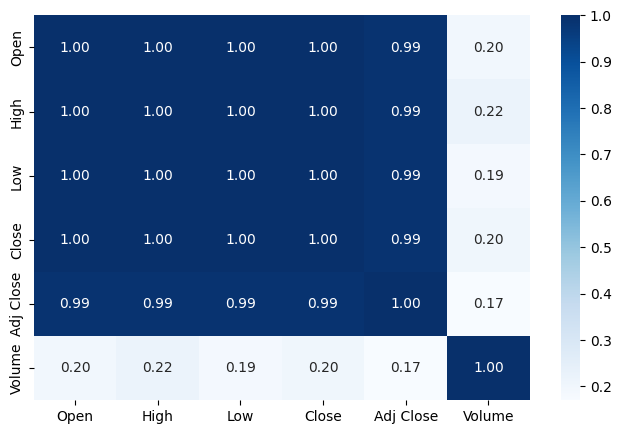

In [ ]:
# Menggunakan seaborn untuk membuat heatmap korelasi antar variabel numerik dalam dataset.
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cbar=True, cmap="Blues")

# Mengatur ukuran gambar heatmap menjadi 8x5 inci.
plt.gcf().set_size_inches(8, 5)

# Menampilkan heatmap.
plt.show()


Berdasarkan visualisasi diatas terlihat bahwa terdapat korelasi positif yang cukup kuat antara harga pembukaan (Open), harga tertinggi (High), harga terendah (Low), harga penutupan (Close), dan harga penutupan yang disesuaikan (Adj Close), yang merupakan hasil yang diharapkan karena biasanya harga saham dalam satu hari akan bergerak bersamaan.

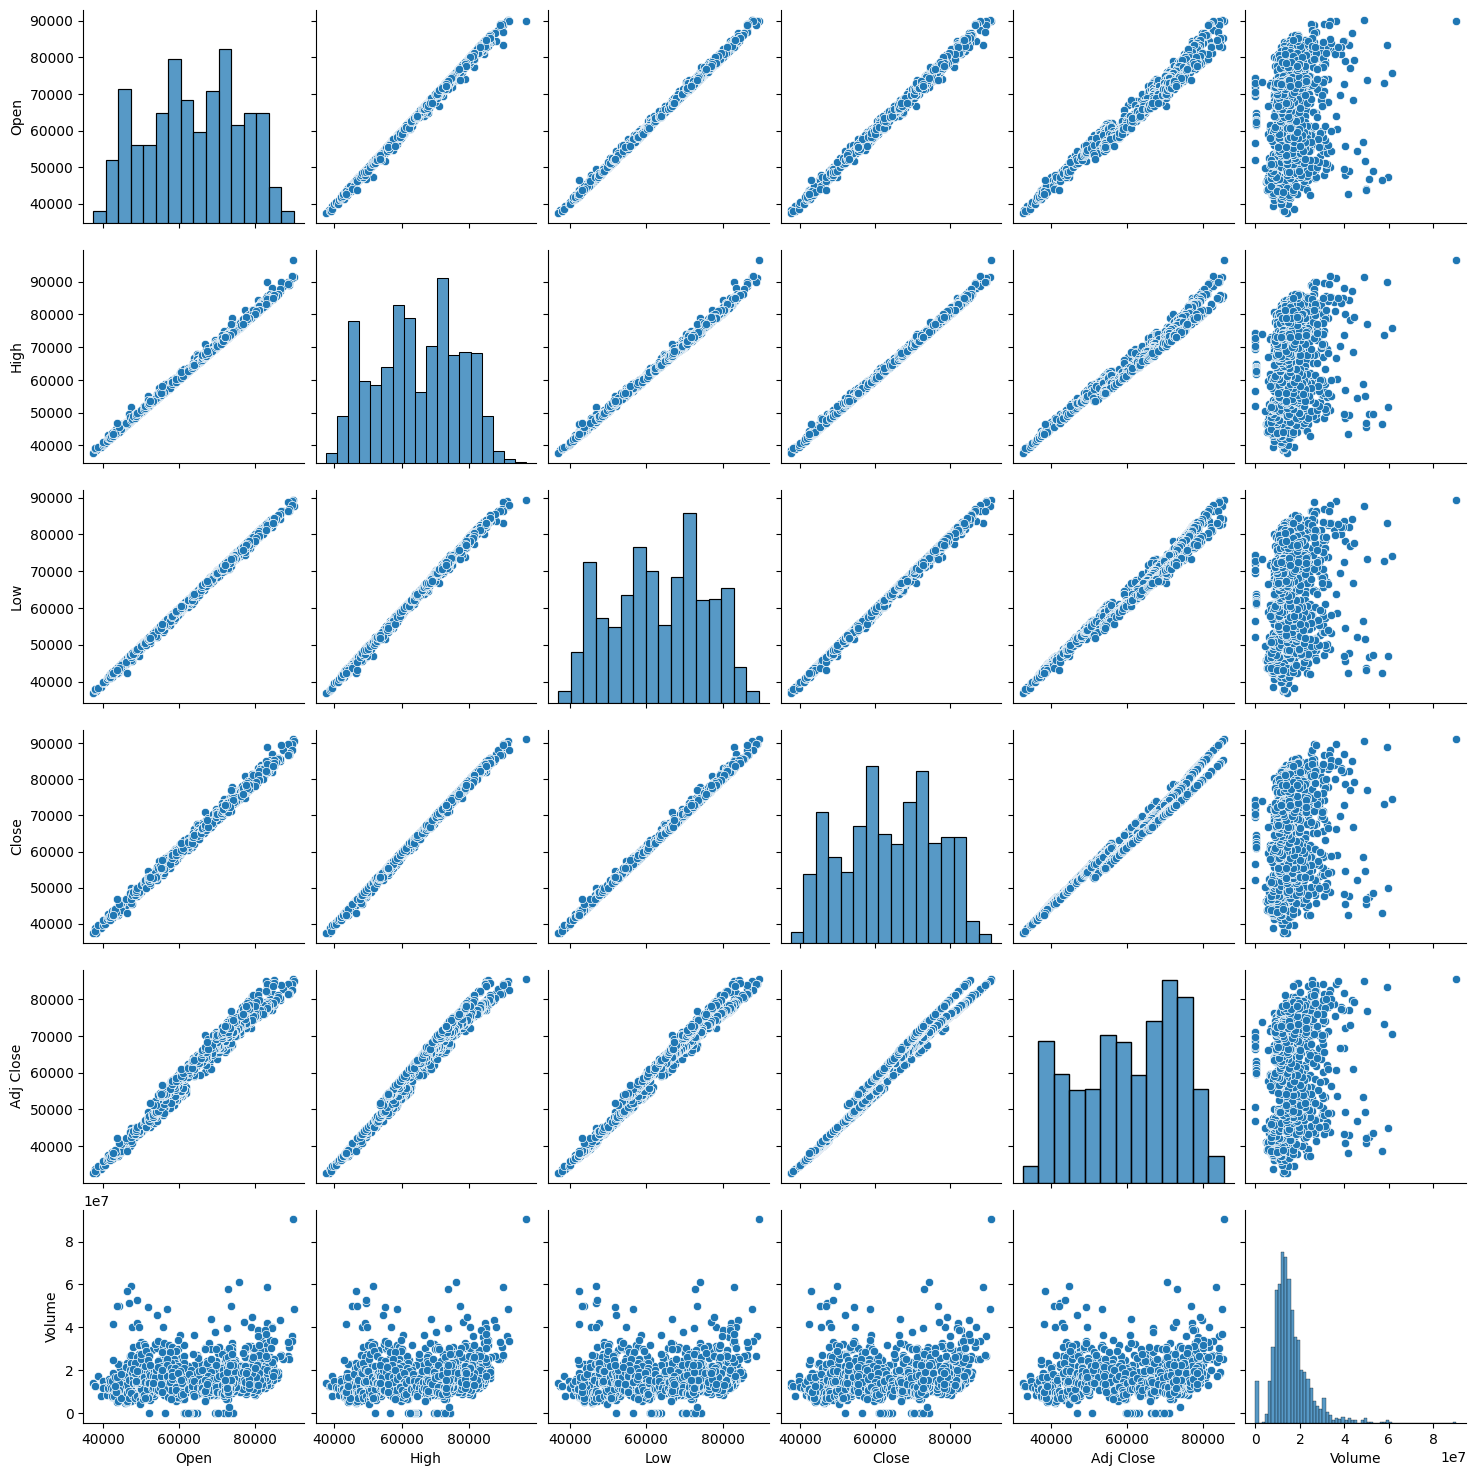

In [ ]:
# Menggunakan seaborn untuk membuat pairplot dari semua variabel dalam dataset.
# Pairplot akan menunjukkan scatter plot dari setiap pasangan variabel dan histogram untuk setiap variabel diagonal.

sns.pairplot(df)

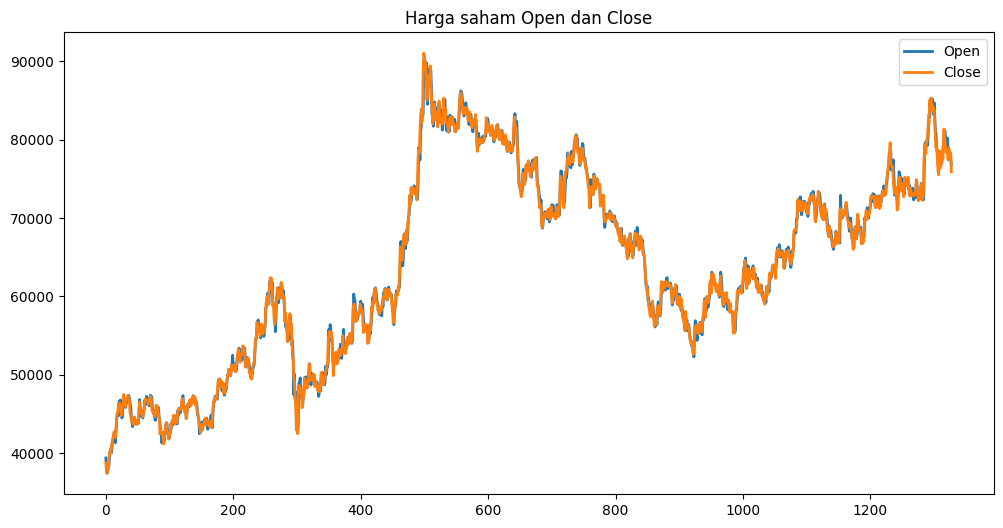

In [ ]:
# Menampilkan pergerakan harga saham pembukaan (Open) dan penutupan (Close) dari waktu ke waktu dalam satu plot.
plt.figure(figsize=(12,6))
plt.plot(df['Open'], label='Open', linewidth=2)
plt.plot(df['Close'], label='Close', linewidth=2)
plt.title('Harga saham Open dan Close')
plt.legend()

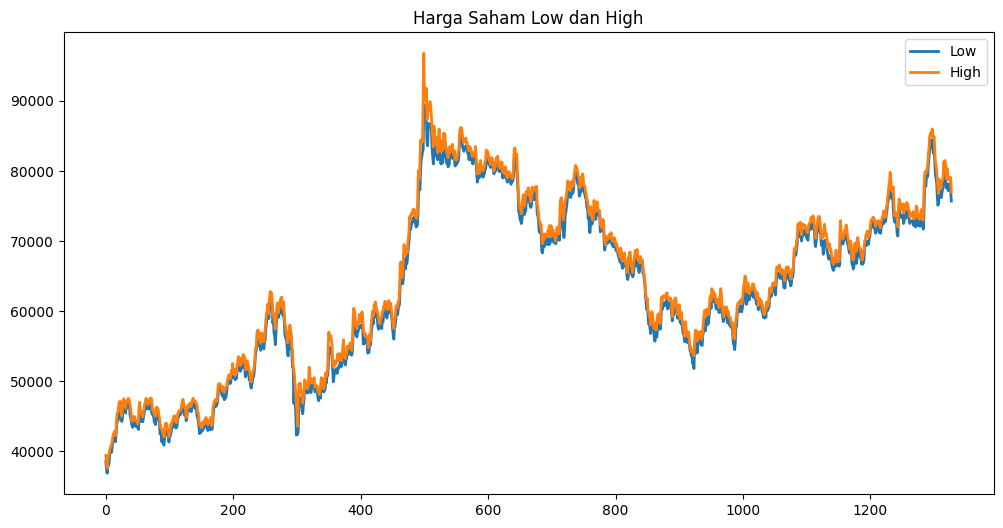

In [ ]:
# Menampilkan pergerakan saham pada harga tertinggi (High) dan harga terendah (Low) selama periode tertentu.
plt.figure(figsize=(12,6))
plt.plot(df['Low'], label='Low', linewidth=2)
plt.plot(df['High'], label='High', linewidth=2)
plt.title('Harga Saham Low dan High')
plt.legend()

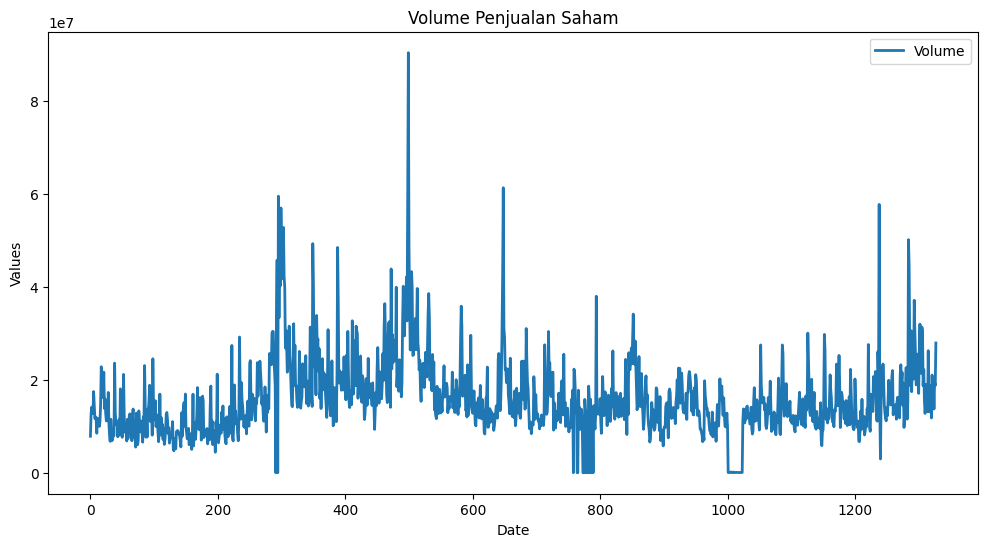

In [ ]:
# Menampilkan volume perdagangan saham Samsung Electronics dari waktu ke waktu.
plt.figure(figsize=(12,6))
plt.plot(df['Volume'], label='Volume', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Volume Penjualan Saham')
plt.legend()

##**Verify Data Quality**

####Missing Values

In [ ]:
pd.DataFrame(df.isna().sum() / len(df) * 100, columns=['Null Ratio'])

,Null Ratio
Date,0.0
Open,0.0
High,0.0
Low,0.0
Close,0.0
Adj Close,0.0
Volume,0.0


Dari tabel diatas, terlihat jika semua kolom memiliki nilai null ratio yang sama yaitu 0.0. Jika Null Ratio adalah 0.0, itu berarti tidak ada data yang hilang atau kosong dalam kolom tersebut. Artinya, setiap baris dalam kolom memiliki nilai yang valid atau terisi.

####Outliers Values

In [ ]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
Open,0.000000
High,0.000000
Low,0.000000
Close,0.000000
Adj Close,0.000000
Volume,4.668675


Dari tabel di atas, terlihat bahwa tidak ada outlier yang terdeteksi dalam kolom Open, High, Low, Close, dan Adj Close. Namun, dalam kolom Volume, terdapat outlier yang mencapai sekitar 4.67% dari total data dalam dataset.

####Duplicated Values

In [ ]:
df[df.duplicated()]

,Date,Open,High,Low,Close,Adj Close,Volume


Dari output diatas, dapat disimpulkan jika setiap baris atau record data mewakili satu entitas unik. Dengan demikian, dataset ini tidak memerlukan tindakan lebih lanjut terkait dengan duplikasi data.

#**DATA MODELLING**

##**Modelling Regresi**

###**Pre-Processing**

#####**Split Data**

In [ ]:
# Memisahkan fitur dan variabel target
x = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']

# Memisahkan dataset menjadi data latih dan data uji
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# x_train: fitur-fitur dari data latih
# x_test: fitur-fitur dari data uji
# y_train: variabel target dari data latih
# y_test: variabel target dari data uji

In [ ]:
# Menampilkan dimensi baris dan kolom
print('Train:', x_train.shape)
print('Test:', x_test.shape)

Train: (1062, 4)
Test: (266, 4)


Output tersebut memberikan informasi tentang jumlah baris dan kolom dalam set data pelatihan dan set data pengujian. Terdapat 1062 sampel dalam set data pelatihan dan 266 sampel dalam set data pengujian. Setiap sampel memiliki 4 fitur (kolom), yang menunjukkan bahwa model machine learning akan dilatih dan diuji menggunakan 4 fitur tersebut untuk melakukan prediksi atau analisis.

In [ ]:
# Inisialisasi model regresi linear sebagai regressor.
regressor = LinearRegression()

# Melatih model menggunakan data pelatihan.
# x_train adalah fitur-fitur dari data pelatihan.
# y_train adalah target yang sesuai dengan data pelatihan.
model = regressor.fit(x_train, y_train)
model

LinearRegression()

In [ ]:
# Menggunakan model yang telah dilatih untuk melakukan prediksi pada data pengujian.
# Hasil prediksi disimpan dalam variabel y_pred.
y_pred = regressor.predict(x_test)

In [ ]:
# Melakukan prediksi terhadap data pengujian
predicted = regressor.predict(x_test)

In [ ]:
# Melakukan pengecekan nilai koefisien dan intercept dari model regresi linear yang telah dilatih
print("Model Coefficients:", regressor.coef_)
print("Model Intercept:", regressor.intercept_)

Model Coefficients: [-6.13469468e-01  7.74392121e-01  8.37298379e-01 -1.35619355e-06]
Model Intercept: 163.88509327683278


In [ ]:
dframe = pd.DataFrame(y_test,predicted)
dfr = pd.DataFrame({'Actual Price':y_test, 'Predicted Regression':predicted})
print(dfr)

      Actual Price  Predicted Regression
1201       72800.0          72733.136432
115        45700.0          45397.880097
979        58000.0          58469.061577
175        47700.0          47502.113257
63         46850.0          47190.352880
...            ...                   ...
1144       66600.0          66863.725580
552        82200.0          81891.810685
1197       70500.0          69994.770331
579        81900.0          81780.296846
1015       63200.0          63548.045236

[266 rows x 2 columns]


Berdasarkan tabel diatas, terlihat perbedaan antara harga aktual dan hasil prediksi dengan model regresi.

In [ ]:
# Menghitung nilai p dari distribusi normal standar
p_value = scipy.stats.norm.sf(abs(1.67))
print('p value is :' + str(p_value))

p value is :0.04745968180294733


In [ ]:
# Melakukan analisis regresi menggunakan Ordinary Least Squares (OLS)
results3 = sm.OLS(y_test, x_test).fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.212e+06
Date:                Sun, 26 May 2024   Prob (F-statistic):                        0.00
Time:                        02:04:56   Log-Likelihood:                         -1939.0
No. Observations:                 266   AIC:                                      3886.
Df Residuals:                     262   BIC:                                      3900.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Open          -0.6006      0.054    -11.056      0.000      -0.708      -0.494
High           0.7196      0.065     11.046      0.000       0.591       0.848
Low            0.8837      0.064     13.840      0.000       0.758       1.009
Volume     -6.512e-06   4.57e-06     -1.424      0.156   -1.55e-05     2.5e-06
==============================================================================
Omnibus:                       14.473   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               30.266
Skew:                          -0.224   Prob(JB):                     2.68e-07
Kurtosis:                       4.591   Cond. No.                     6.30e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 6.3e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Menghitung koefisien determinasi (R-squared)
regression_confiedence = regressor.score(x_test, y_test)
print('Linear Regression Confiedence: ', regression_confiedence)

Linear Regression Confiedence:  0.9990532854460176


##**Modelling SVM**

In [ ]:
# Inisialisasi objek StandardScaler untuk melakukan penskalaan fitur.
scaler = StandardScaler()

# Melakukan penskalaan fitur pada data pelatihan (x_train).
# Metode fit_transform() digunakan untuk menghitung rata-rata dan standar deviasi dari setiap fitur di x_train,
x_train_scaled = scaler.fit_transform(x_train)

# Melakukan penskalaan fitur pada data pengujian (x_test) menggunakan parameter yang sama
# Metode transform() digunakan untuk menerapkan penskalaan yang sama seperti yang diterapkan pada data pelatihan.
x_test_scaled = scaler.transform(x_test)


In [ ]:
# Inisialisasi model SVM dengan kernel radial basis function (RBF).
# Parameter C adalah parameter penalti untuk kesalahan margin, sedangkan epsilon adalah lebar koridor dalam formulasi fungsi kerugian SVR.
svr_model = SVR(kernel='rbf', C=100, epsilon=0.1)

# Melatih model SVR menggunakan data fitur yang telah di-skala (x_train_scaled) dan target (y_train).
svr_model.fit(x_train_scaled, y_train)

SVR(C=100)

In [ ]:
# Menggunakan model SVR yang telah dilatih sebelumnya untuk melakukan prediksi pada data pengujian
predictions = svr_model.predict(x_test_scaled)

In [ ]:
dframe = pd.DataFrame(y_test,predicted)
dfr = pd.DataFrame({'Actual Price':y_test, 'Predicted SVM':predictions})
print(dfr)

      Actual Price  Predicted SVM
1201       72800.0   72966.950229
115        45700.0   48088.533871
979        58000.0   58448.638276
175        47700.0   48337.012990
63         46850.0   48686.637447
...            ...            ...
1144       66600.0   66998.022776
552        82200.0   77449.707686
1197       70500.0   69730.082959
579        81900.0   77718.973493
1015       63200.0   63459.641108

[266 rows x 2 columns]


Berdasarkan tabel diatas, terlihat perbedaan antara harga aktual dan hasil prediksi dengan model SVM.

#**EVALUATION**

##**Regression**

###**Evaluate Results**

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,predicted))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,predicted))
print('Root Mean Squared Error:', math.sqrt(metrics.mean_squared_error(y_test,predicted)))

Mean Absolute Error: 276.82552932335665
Mean Squared Error: 130213.95915581977
Root Mean Squared Error: 360.85171352762035


Output tersebut memberikan gambaran tentang kualitas prediksi model regresi linear untuk harga saham Samsung Electronics. Dengan Mean Absolute Error (MAE) sebesar 276.83, Mean Squared Error (MSE) sebesar 130213.96, dan Root Mean Squared Error (RMSE) sebesar 360.85, dapat disimpulkan bahwa model memiliki kinerja yang cukup baik dalam memprediksi harga saham berdasarkan fitur-fitur yang diberikan. Semakin rendah nilai-nilai ini, semakin baik kemampuan prediksi model.

###**Model Accuracy**

In [ ]:
x2 = abs(predicted - y_test)
y2 = 100 * (x2 / y_test)
accuracy = 100 - np.mean(y2)
print('Accuracy Regression:', round(accuracy, 2), '%.')

Accuracy Regression: 99.56 %.


Berdasarkan ouput diatas model Regresi secara rata-rata memprediksi harga saham dengan akurasi sekitar 99.56%. Semakin tinggi nilai akurasi, semakin baik kemampuan prediksi model.

##**SVM**

###**Evaluate Results**

In [ ]:
mse = mean_squared_error(y_test, predictions)
print('Mean Squared Error:', mse)

Mean Squared Error: 10179086.397610433


Berdasarkan output diatas didapatkan Mean Squared Error (MSE) sebesar 10179086.40. MSE yang tinggi menunjukkan bahwa terdapat ketidakcocokan yang signifikan antara nilai prediksi dan nilai sebenarnya.

###**Model Accuracy**

In [ ]:
r2 = r2_score(y_test, predictions)
accuracy_percentage = r2 * 100
print("Accuracy SVM:", accuracy_percentage)

Accuracy SVM: 92.59934241970865


Nilai R-squared yang tinggi menunjukkan bahwa model SVM cukup baik dalam menjelaskan variasi dalam data harga saham Samsung Electronics, meskipun masih ada ruang untuk peningkatan.

##**Determine Next Steps**

In [ ]:
dframe = pd.DataFrame(y_test,predicted)
dfr = pd.DataFrame({'Actual Price':y_test, 'Predicted Regression':predicted,'Predicted SVM':predictions})
dfr = dfr.round(1)

In [ ]:
dfr

,Actual Price,Predicted Regression,Predicted SVM
1201,72800.0,72733.1,72967.0
115,45700.0,45397.9,48088.5
979,58000.0,58469.1,58448.6
175,47700.0,47502.1,48337.0
63,46850.0,47190.4,48686.6
...,...,...,...
1144,66600.0,66863.7,66998.0
552,82200.0,81891.8,77449.7
1197,70500.0,69994.8,69730.1
579,81900.0,81780.3,77719.0


Dari output tabel tersebut, terlihat bahwa baik model regresi linear maupun model Support Vector Machine (SVM) cenderung memberikan prediksi harga saham yang cukup dekat dengan nilai sebenarnya dalam sebagian besar kasus. Namun, terdapat beberapa perbedaan antara nilai prediksi dan nilai sebenarnya untuk beberapa sampel data. Ini menunjukkan bahwa meskipun kedua model memiliki kinerja yang baik secara umum, masih ada ruang untuk peningkatan dalam memprediksi harga saham yang tepat.

Model regresi linear cenderung memberikan prediksi yang lebih rendah atau konservatif, sementara model SVM cenderung memberikan prediksi yang sedikit lebih tinggi.

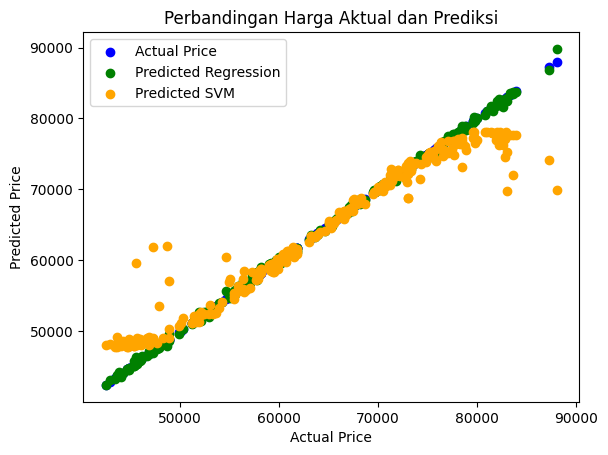

In [ ]:
# Membuat DataFrame
dfr = pd.DataFrame({'Actual Price': y_test, 'Predicted Regression': predicted, 'Predicted SVM': predictions})

# Membuat scatter plot dengan warna berbeda
plt.scatter(dfr['Actual Price'], dfr['Actual Price'], color='blue', label='Actual Price')
plt.scatter(dfr['Actual Price'], dfr['Predicted Regression'], color='green', label='Predicted Regression')
plt.scatter(dfr['Actual Price'], dfr['Predicted SVM'], color='orange', label='Predicted SVM')

# Menambahkan label dan judul
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Perbandingan Harga Aktual dan Prediksi')

# Menambahkan legenda
plt.legend()

# Menampilkan plot
plt.show()

Grafik diatas menunjukkan perbandingan antara harga aktual dan harga prediksi saham. Harga aktual diwakili oleh garis biru, sedangkan harga prediksi diwakili oleh dua garis lainnya, yaitu garis hijau (prediksi regresi) dan garis orange(prediksi SVM).

Berdasarkan grafik, dapat dilihat bahwa harga aktual dan prediksi dengan model regresi memiliki memiliki akurasi ketepatan yang tinggi. Hal ini menunjukkan bahwa model prediksi regresi yang digunakanhampir akurat dalam memprediksi harga aktual.

<Axes: >

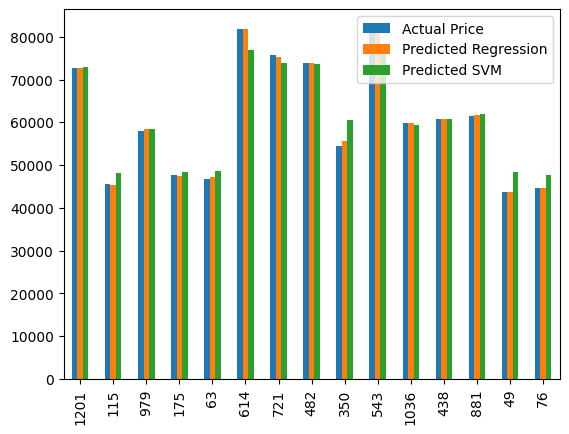

In [ ]:
graph = dfr.head(15)
graph.plot(kind='bar')

Berdasarkan grafik diatas terlihat bahwa model Regresi memiliki hasil yang paling dekat dengan harga aktual saham.

**Kesimpulan**

Dengan mempertimbangkan persentase akurasi dari masing-masing model dan berdasarkan hasil visualisasi yang telah dilakukan, model regresi linear menunjukkan tingkat akurasi yang lebih tinggi dengan hasil score 99.56%, dibandingkan dengan model Support Vector Machine (SVM) yang memiliki akurasi sebesar 92.60%. Oleh karena itu, dari sudut pandang akurasi, model regresi linear lebih baik dibandingkan model SVM. Berdasarkan perbandingan ini, langkah selanjutnya dapat melibatkan penyesuaian lebih lanjut atau fine-tuning pada model regresi linear untuk meningkatkan akurasi dalam memprediksi harga saham.